# Walmart Sales Data Analysis and Prediction


### **1. Introduction**

### **Data Description**

- **Source**: The dataset used in this project is sourced from Kaggle, specifically the "Walmart Sales" dataset, which provides a comprehensive look at weekly sales data for 45 Walmart stores. This dataset captures essential aspects of retail operations and economic conditions influencing sales outcomes.
- **Features**: Provide a brief description of each variable in the dataset.
    
    The data contains the following columns:
    
    - **Store**: Represents the unique number assigned to each Walmart store.
    - **Date**: Indicates the start date of the sales week for which the data is recorded.
    - **Weekly_Sales**: The total sales amount in USD that the store achieved in the given week.
    - **Holiday_Flag**: A binary indicator (0 or 1), with 1 signifying that there was a holiday during the week and 0 indicating a non-holiday week.
    - **Temperature**: The average air temperature in the region where the store is located during the week, measured in degrees Fahrenheit.
    - **Fuel_Price**: The cost of fuel in the region where the store is located, reported as the price per gallon during the sales week.
    - **CPI**: The Consumer Price Index for the region, indicating the relative cost of goods and services to the consumer during the week.
    - **Unemployment**: The unemployment rate in the region, representing the percentage of the labor force that is jobless and seeking employment during the week.
- **Reaseach Question**
    1. How can we cluster the store based on features like temperature, gas price, ect. and economic factors(e.g. sales CPI, umemployment rate)?
    2. How do various factors such as economic indicators, weather conditions, and seasonal periods affect weekly sales at Walmart stores?


- **Objective**

    The primary objective of this project is to understand and enhance Walmart's store performance through a dual approach:
    1. **Comparative Analysis**: Analyze the the impact of various factors on sales. Utilize clustering techniques to categorize Walmart stores based on historical sales data and other influencing factors such as holidays, temperature, and economic indicators.
    2. **Predictive Modeling**: Develop models to forecast future sales by various factors, including temperature, fuel prices, unemployment rates, consumer price index (CPI), holiday periods, and store-specific characteristics, affect weekly sales.
    
    
- **Importance of the Study**

    This comprehensive analysis is vital for Walmart as it helps to identify key factors contributing to store performance, allowing for targeted strategies to maximize profitability. Predictive modeling further aids in anticipating future trends, facilitating proactive management. Such insights are crucial for maintaining competitive advantage, optimizing operational efficiency, and enhancing customer satisfaction across various store locations.

- **Learning Model**
    1. For research question 1: K-Means Clustering
    2. For research question 2: Random Forest Regressor
   
- **Expectation**

    We anticipate that the cluster analysis will reveal distinct groups of stores characterized by specific economic and environmental patterns influencing sales performance. For instance, stores in regions with higher unemployment may exhibit lower sales volumes, whereas those in areas with higher CPI might reflect increased sales, likely due to inflationary effects. Temperature variations are expected to impact seasonal sales trends, and fuel prices might influence consumer spending behaviors. These expectations are based on economic theories that suggest spending is sensitive to local economic conditions and the availability of disposable income.

    
 
- **Evaluation of the project**
    1. For research question 1: To evaluate the project, We will use cluster validity indices such as the silhouette score to assess how well the clusters are defined and separated. This helps ensure that the clusters are meaningful and statistically significant. At the same time, we will cross-compare and analyze the results through graph to ensure the correctness of the results。
    2. For research question 2: To evaluate the correctness of the model, we would examine the metrics from both the training and testing phases to assess overfitting and generalizability, and utilize plots of actual vs. predicted sales along with residuals to visually confirm that the model’s predictions align well with real outcomes and that errors are randomly, not systematically, distributed.


### **2. Data Implementation of Research Question #1 - Comparative Analysis**

- **Cleaning**:
    - Missing Value: A preliminary review of the dataset confirms that there are no missing values. This simplifies the cleaning process and allows us to focus on other aspects of data preparation.
    - Anomalies and Integrity: Check for any anomalies such as negative sales figures, unlikely temperature readings (extreme values), or other data inconsistencies that could affect analysis. 


In [116]:
# All the libraries we used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [117]:
# Load the data
walmart_data = pd.read_csv('Walmart_sales.csv')
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Step 1: Data Preparation

In [118]:
# Anamalies and integrity check:
# Create list of features we wanna analysis
features = walmart_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Check data types and convert if necessary
print("Data types before conversion:")
print(walmart_data.dtypes)

# Convert 'Date' to 
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format = '%d-%m-%Y')

print("\nData types after conversion:")
print(walmart_data.dtypes)

Data types before conversion:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Data types after conversion:
Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


In [119]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scaled_walmart_data = walmart_data.copy()
scaler = StandardScaler()
scaled_walmart_data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']] = scaler.fit_transform(scaled_walmart_data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']])

### Step 2: Exploratory Data Analysis (EDA) For Research Question #1

- **Statistical Summary**: Use descriptive statistics to summarize the data.

- **Visualization**: Generate plots to understand relationships between features:
  1. Sales Trends Over Time: Plot the weekly sales for a few stores to visualize sales trends and identify seasonal patterns or anomalies.
  2. Impact of Holidays on Sales: Compare the sales during holiday weeks versus non-holiday weeks across stores.
  3. Temperature Effects on Sales: Explore how the weekly sales correlate with the temperature to see if warmer or colder temperature affect sales.
  4. Correlation Matrix: Display a heatmap to understand the relationships between numerical features like sales, temperature, fuel price, CPI, and unemployment


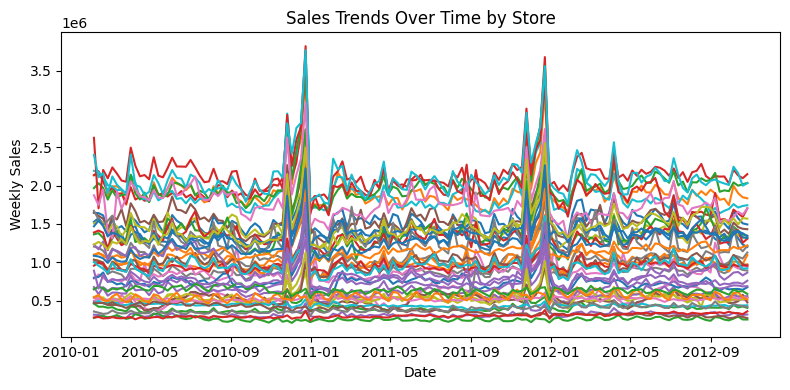

In [121]:
# Visitualizatrion
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Visualization 1: Sales Trends Over Time
# Plotting sales trends for a sample of stores

plt.figure(figsize=(8, 4))
sample_stores = walmart_data['Store'].unique()[:45]
for store in sample_stores:
    subset = walmart_data[walmart_data['Store'] == store]
    # Convert to numpy arrays to ensure compatibility with matplotlib
    dates = subset['Date'].values
    sales = subset['Weekly_Sales'].values
    # Plotting the sales trends
    plt.plot(dates, sales, label=f'Store {store}')

plt.title('Sales Trends Over Time by Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

- **Sales Trends Over Time by Store**: Variability in sales trends across stores with noticeable spikes likely corresponding to holidays, signifying their impact on sales.

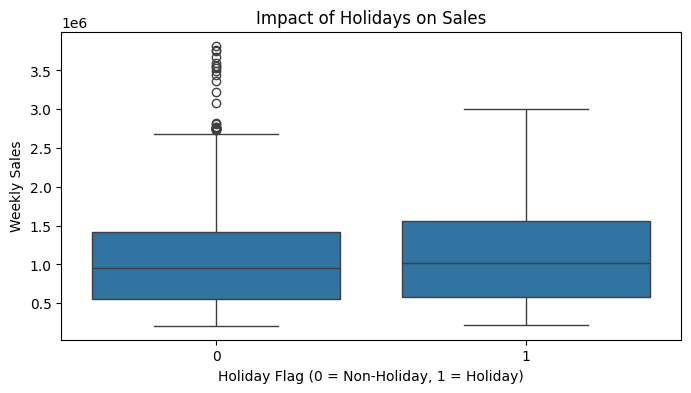

In [122]:
## Visualization 2: Impact of Holidays on Sales
# Boxplot to compare sales on holiday vs. non-holiday weeks
plt.figure(figsize=(8, 4))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=walmart_data)
plt.title('Impact of Holidays on Sales')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Weekly Sales')
plt.show()

- **Impact of Holidays on Sales**: Holidays are associated with higher sales, as evidenced by the boxplot, but also with greater variance, highlighting their significant impact.

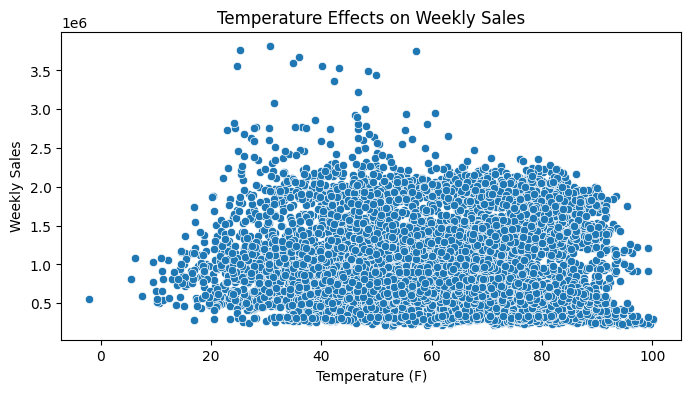

In [123]:
## Visualization 3: Temperature Effects on Sales
# Scatter plot to visualize the relationship between temperature and sales
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=walmart_data)
plt.title('Temperature Effects on Weekly Sales')
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly Sales')
plt.show()

- **Temperature Effects on Weekly Sales**: No clear correlation between temperature and sales suggests a more complex set of influencing factors.

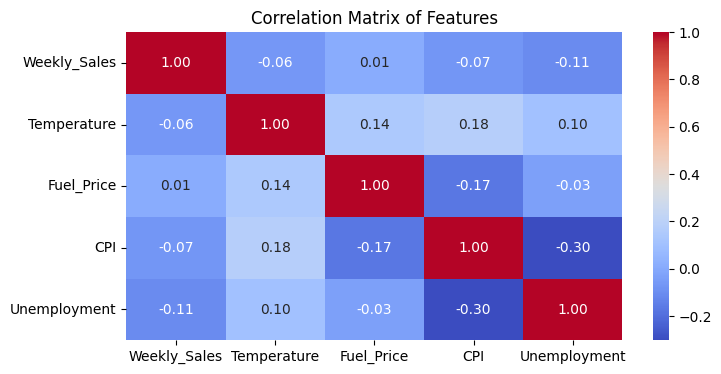

In [124]:
## Visualization 4: Correlation Matrix
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 4))
corr_matrix = walmart_data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

- **Correlation Matrix of Features**: Weak linear correlations between sales and other features suggest that sales are influenced by m ltifaceted,  ossibl relationships.

### Step 3: Clustering
Clustering stores based on sales performance and other features can provide insights into which stores are similar in terms of their features.

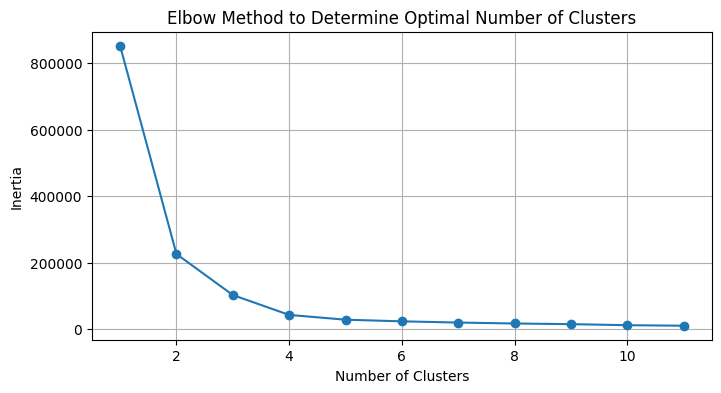

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# get optimal number of clusters using the elbow method
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(store_sales)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 12), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

From the graph, it looks like the elbow point is around 3 clusters. This suggests that clustering the stores into either 3 groups might provide a meaningful segmentation based on their sales performance.

In [127]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

features_for_clustering = store_sales[['Total_Sales', 'Average_Sales', 'Avg_Temperature', 'Avg_CPI', 'Avg_Unemployment', 'Avg_Fuel_Price']]

# Applying K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
store_sales['Cluster'] = kmeans.fit_predict(features_for_clustering)
store_sales['Cluster'] = store_sales['Cluster'] + 1
# Analyzing the clusters
clustered_data = store_sales.groupby('Cluster').agg({
    'Total_Sales': ['mean', 'min', 'max'],
    'Average_Sales': ['mean', 'min', 'max'],
    'Avg_Temperature': ['mean', 'min', 'max'],
    'Avg_CPI': ['mean', 'min', 'max'],
    'Avg_Unemployment': ['mean', 'min', 'max'],
    'Avg_Fuel_Price': ['mean', 'min', 'max'],
    'Store': 'count'
}).reset_index()

# Rename for read
clustered_data.columns = ['Cluster', 'Total_Sales_Mean', 'Total_Sales_Min', 'Total_Sales_Max', 
                          'Average_Sales_Mean', 'Average_Sales_Min', 'Average_Sales_Max', 
                          'Avg_Temperature_Mean', 'Avg_Temperature_Min', 'Avg_Temperature_Max', 
                          'Avg_CPI_Mean', 'Avg_CPI_Min', 'Avg_CPI_Max', 
                          'Avg_Unemployment_Mean', 'Avg_Unemployment_Min', 'Avg_Unemployment_Max',
                          'Avg_Fuel_Price_Mean', 'Avg_Fuel_Price_Min', 'Avg_Fuel_Price_Max', 
                          'Store_Count']

display(clustered_data)

numeric_columns = store_sales.select_dtypes(include=['float64', 'int64']).columns
data_for_clustering = store_sales[numeric_columns]
silhouette = silhouette_score(data_for_clustering, store_sales['Cluster'] )
print(f"Silhouette Score for k = 4 is {silhouette}")

,Cluster,Total_Sales_Mean,Total_Sales_Min,Total_Sales_Max,Average_Sales_Mean,Average_Sales_Min,Average_Sales_Max,Avg_Temperature_Mean,Avg_Temperature_Min,Avg_Temperature_Max,Avg_CPI_Mean,Avg_CPI_Min,Avg_CPI_Max,Avg_Unemployment_Mean,Avg_Unemployment_Min,Avg_Unemployment_Max,Avg_Fuel_Price_Mean,Avg_Fuel_Price_Min,Avg_Fuel_Price_Max,Store_Count
0,1,-135.290941,-199.452798,-66.133493,-0.946090,-1.394775,-0.462472,0.120202,-1.135549,0.871006,0.286878,-1.090082,1.220936,0.063468,-1.012545,2.728168,-0.039948,-0.336404,0.539916,18
1,2,39.423897,-38.867542,131.201782,0.275692,-0.271801,0.917495,-0.114458,-0.922034,0.640713,-0.175570,-1.090082,1.216167,0.023349,-1.707667,2.728168,0.013948,-0.308583,0.539916,20
2,3,235.251284,184.539673,268.785566,1.645114,1.290487,1.879619,0.017932,-0.377729,0.627723,-0.236058,-1.090082,1.119792,-0.229915,-1.084617,0.346315,0.062873,-0.308583,0.478637,7


Silhouette Score for k = 4 is 0.5911205374046148


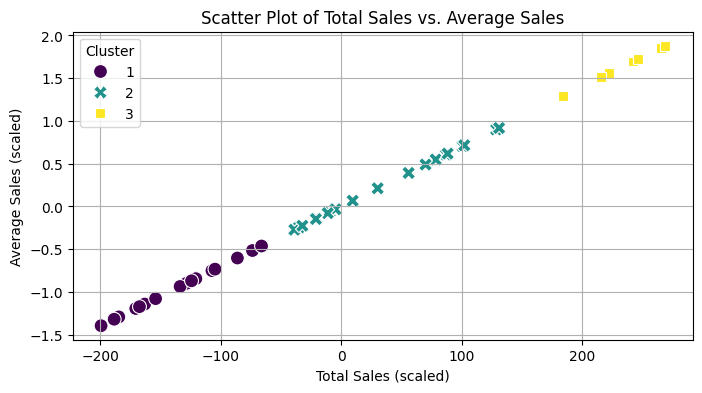

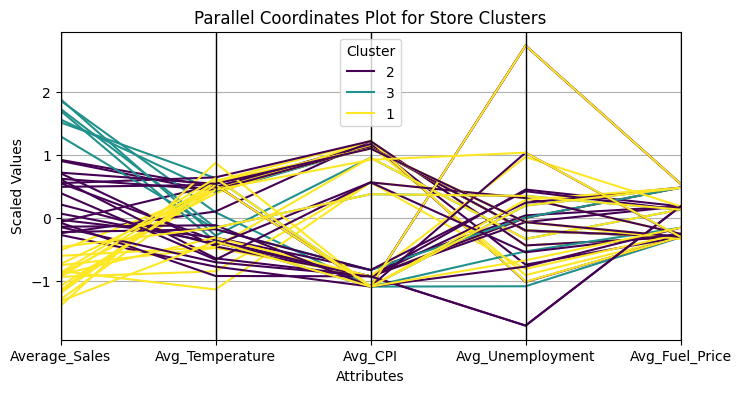

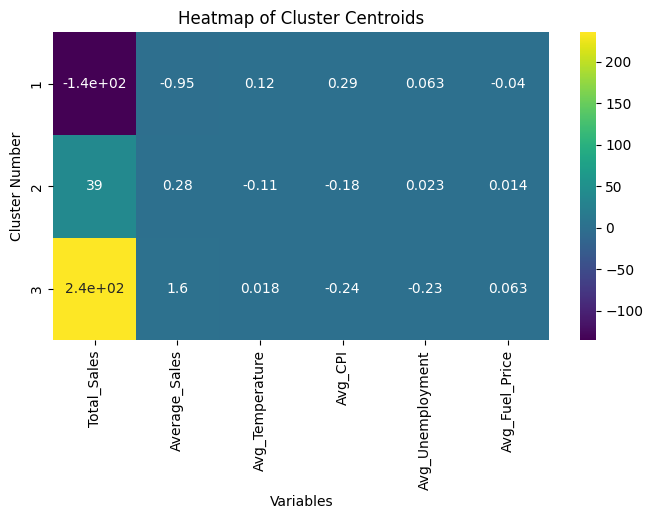

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import parallel_coordinates

# Scatter Plot for Total Sales vs. Average Sales colored by Cluster
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Total_Sales', y='Average_Sales', hue='Cluster', data=store_sales, palette='viridis', style='Cluster', s=100)
plt.title('Scatter Plot of Total Sales vs. Average Sales')
plt.xlabel('Total Sales (scaled)')
plt.ylabel('Average Sales (scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Parallel Coordinates Plot for multidimensional data visualization
plt.figure(figsize=(8, 4))
parallel_coordinates(store_sales[['Cluster', 'Average_Sales', 'Avg_Temperature', 'Avg_CPI', 'Avg_Unemployment', 'Avg_Fuel_Price']], 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot for Store Clusters')
plt.xlabel('Attributes')
plt.ylabel('Scaled Values')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# Heatmap of the cluster centroids
plt.figure(figsize=(8, 4))
cluster_centroids = store_sales.groupby('Cluster').mean().reset_index()
cluster_centroids = cluster_centroids.drop(['Store'], axis=1, errors='ignore')
sns.heatmap(cluster_centroids.drop('Cluster', axis=1), annot=True, cmap='viridis', yticklabels=[1,2,3])
plt.title('Heatmap of Cluster Centroids')
plt.xlabel('Variables')
plt.ylabel('Cluster Number')
plt.show()


### Step 4: Cluster Analysis Overview
The silhouette score = 0.574649 which means our K means clutering model having a moderate to good clustering configuration.
#### Cluster 1
- **Stores**: 9
- **Total Sales Mean**: 211.86 (scaled units)
- **Average Sales Range**: 0.90 to 1.88 (scaled units)
- **Temperature Mean**: Approximately average with slight variations from -0.38 to 0.63 (scaled units)
- **CPI Mean**: Slightly above average, with a range from very low to quite high within the cluster (scaled units)
- **Unemployment Mean**: Lower than average, suggesting better employment conditions (scaled units)
- **Fuel Price**: Close to average
- **Implication**: This cluster appears to consist of high-performing stores, situated in economically stable regions with moderate environmental variations.

#### Cluster 2
- **Stores**: 18
- **Total Sales Mean**: -135.29 (scaled units)
- **Average Sales Range**: -1.39 to -0.46 (scaled units)
- **Temperature Mean**: Slightly above average, with significant fluctuations from very low to high (scaled units)
- **CPI Mean**: Slightly above average, exhibiting a wide range within the group (scaled units)
- **Unemployment Mean**: Ranges from slightly below to significantly above average, indicating variable economic conditions
- **Fuel Price**: Slightly below average
- **Implication**: Stores in this cluster generally have lower sales performance and face significant economic and environmental challenges, which may include higher unemployment and greater CPI variability.

#### Cluster 3
- **Stores**: 18
- **Total Sales Mean**: 29.36 (scaled units)
- **Average Sales Range**: -0.27 to 0.72 (scaled units)
- **Temperature Mean**: Slightly below average (scaled units)
- **CPI Mean**: Generally below average, indicating less economic inflation pressure
- **Unemployment Mean**: Moderately good, with significant variability
- **Fuel Price**: Slightly above average
- **Implication**: This cluster includes stores with moderate sales performance, likely influenced by cooler climates, more stable but modest economic conditions.

### Insights and Actions Based on Cluster Analysis

**Insights**:
- **Cluster 1**: This group consists of stores that are thriving in favorable economic conditions. They are likely located in areas with strong consumer demand and stable economic indicators.
- **Cluster 2**: Stores in this cluster are facing significant challenges, likely due to economic downturns or unfavorable environmental factors. These stores require targeted support to overcome their struggles.
- **Cluster 3**: Moderate-performing stores in this cluster are operating in relatively stable economic environments but may face limitations due to cooler temperatures. 

**Actions**:
- **Cluster 1**: Use the success of these stores by applying their strategies across the network. Explore further investment and expansion opportunities.
- **Cluster 2**: Support these stores with targeted marketing and operational changes. Focus on analyzing efficiencies and reducing costs.
- **Cluster 3**: Boost store performance through innovation and community engagement. Conduct internal audits and enhance staff training on customer service to optimize results.

### **3. Data Implementation of Research Question #2 - Predictive Modeling**
We will use a Random Forest model to predict future sales based on historical data and various predictive features.

### Step 1: Data Preparation and Model Setup
We prepared the Walmart sales dataset by marking high-sales periods with a 'newyear_flag' for the holiday season from November 16th to December 31st. The data was split into 80% for training and 20% for testing. The Random Forest model trained on this data showed high accuracy, scoring 99.0% on training and 93.4% on testing, indicating strong model performance.

Mean Squared Error: 19561685125.50152
Mean Absolute Error: 76673.51340800003
R-squared: 0.9347388652382242
Training score: 0.9898082612636705
Testing score: 0.9347388652382242


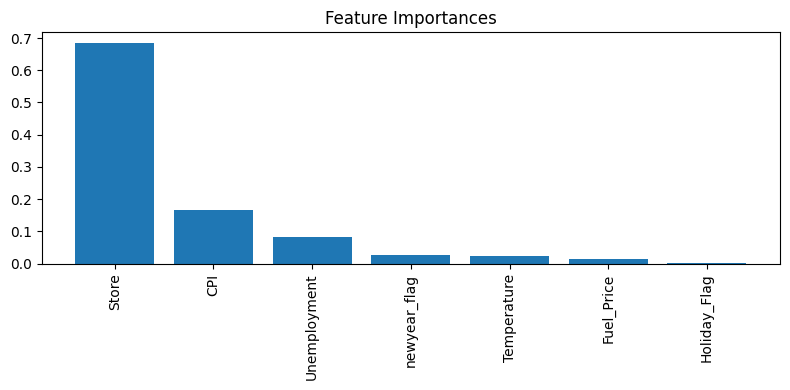

In [137]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = walmart_data.copy()

## Data Cleaning
df = df.sample(n=2000, random_state=42)

# Convert the 'Date' column to datetime format, assuming the format in your file is day-first
df["Date"] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort data by date
df = df.sort_values(by="Date")

# Define the period as November 16th to December 31st
df['newyear_flag'] = ((df['Date'].dt.month == 11) & (df['Date'].dt.day > 15)) | (df['Date'].dt.month == 12)

# Set 'newyear_flag' to 1 for the high sales period and 0 otherwise
df['newyear_flag'] = df['newyear_flag'].astype(int)

# Load and prepare the data
x = df.drop(columns=['Weekly_Sales', 'Date'])
y = df['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor with n_estimators = 100
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate regression metrics for the model with 100 trees
mse_100 = mean_squared_error(y_test, y_pred)
mae_100 = mean_absolute_error(y_test, y_pred)
r2_100 = r2_score(y_test, y_pred)

# Output the metrics for the model with 100 trees
print(f"Mean Squared Error: {mse_100}")
print(f"Mean Absolute Error: {mae_100}")
print(f"R-squared: {r2_100}")

# Evaluate the model on the training data for the model with 100 trees
train_score_100 = rf.score(X_train, y_train)
test_score_100 = rf.score(X_test, y_test)

# Output the model scores
print(f"Training score: {train_score_100}")
print(f"Testing score: {test_score_100}")

# Plot feature importances for the model with 100 trees
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 4))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x.shape[1]), x.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


### Step 2: Model Performance Improvement

In [138]:
# Initialize and train the Random Forest Regressor with 150 trees
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate regression metrics for the model with 150 trees
mse_150 = mean_squared_error(y_test, y_pred)
mae_150 = mean_absolute_error(y_test, y_pred)
r2_150 = r2_score(y_test, y_pred)

# Output the metrics for the model with 150 trees
print(f"Mean Squared Error: {mse_150}")
print(f"Mean Absolute Error: {mae_150}")
print(f"R-squared: {r2_150}")

# Evaluate the model on the training data for the model with 150 trees
train_score_150 = rf.score(X_train, y_train)
test_score_150 = rf.score(X_test, y_test)

# Output the model scores
print(f"Training score: {train_score_150}")
print(f"Testing score: {test_score_150}")

Mean Squared Error: 19012453303.796024
Mean Absolute Error: 76100.14886383335
R-squared: 0.9365711967424795
Training score: 0.9896504958797017
Testing score: 0.9365711967424795


In [139]:
# Initialize and train the Random Forest Regressor with 200 trees
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate regression metrics for the model with 200 trees
mse_200 = mean_squared_error(y_test, y_pred)
mae_200 = mean_absolute_error(y_test, y_pred)
r2_200 = r2_score(y_test, y_pred)

# Output the metrics for the model with 200 trees
print(f"Mean Squared Error: {mse_200}")
print(f"Mean Absolute Error: {mae_200}")
print(f"R-squared: {r2_200}")

# Evaluate the model on the training data for the model with 200 trees
train_score_200 = rf.score(X_train, y_train)
test_score_200 = rf.score(X_test, y_test)

# Output the model scores
print(f"Training Score: {train_score_200}")
print(f"Testing Score: {test_score_200}")


Mean Squared Error: 19669596356.065357
Mean Absolute Error: 76511.61960787504
R-squared: 0.9343788548753668
Training Score: 0.9899308100822017
Testing Score: 0.9343788548753668


In [140]:
import pandas as pd

# Example data for the Random Forest models with varying n_estimators
data1 = {
    'Model': 'Random Forest - 100 Trees',
    'Mean Squared Error': mse_100,
    'Mean Absolute Error': mae_100,
    'R-squared': r2_100,
    'Training Score': train_score_100,
    'Testing Score': test_score_100
}

data2 = {
    'Model': 'Random Forest - 150 Trees',
    'Mean Squared Error': mse_150,
    'Mean Absolute Error': mae_150,
    'R-squared': r2_150,
    'Training Score': train_score_150,
    'Testing Score': test_score_150
}

data3 = {
    'Model': 'Random Forest - 200 Trees',
    'Mean Squared Error': mse_200,
    'Mean Absolute Error': mae_200,
    'R-squared': r2_200,
    'Training Score': train_score_200,
    'Testing Score': test_score_200
}

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame([data1, data2, data3])

# Display the DataFrame
print(df)


                       Model  Mean Squared Error  Mean Absolute Error  \
0  Random Forest - 100 Trees        1.956169e+10         76673.513408   
1  Random Forest - 150 Trees        1.901245e+10         76100.148864   
2  Random Forest - 200 Trees        1.966960e+10         76511.619608   

   R-squared  Training Score  Testing Score  
0   0.934739        0.989808       0.934739  
1   0.936571        0.989650       0.936571  
2   0.934379        0.989931       0.934379  



##### Model Insights and Economic Indicators
The model analysis revealed that economic factors like the Consumer Price Index (CPI) and unemployment rates heavily influence sales. A histogram of feature importances visually displayed the impact of these factors, with CPI and unemployment being notably influential. This confirms the significant role of economic and seasonal variables in affecting sales trends.

The comparison among three Random Forest models with different numbers of trees (`n_estimators`) reveals that the model with 150 trees achieves the best overall performance. It has the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating it predicts more accurately with less average error. Additionally, this model has the highest R-squared value, suggesting it captures more of the variance in the data, which reflects its strength in generalization. The high training scores across all models indicate they fit well to the training data, with no significant indication of overfitting.

The consistency in testing scores, with the model with 150 trees scoring the highest, suggests this configuration may be the optimal choice for generalization and reliability. Given these results, the model with 150 trees seems to balance accuracy and efficiency, making it a promising candidate for further use or refinement. 

### Step 3: Assess the accuracy and reliability of Random Forest Model

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training RMSE: 57845.11349700403, Testing RMSE: 137885.65300202928
Training MAE: 31023.752706791685, Testing MAE: 76100.14886383335
Training MAPE: 2.84%, Testing MAPE: 7.13%


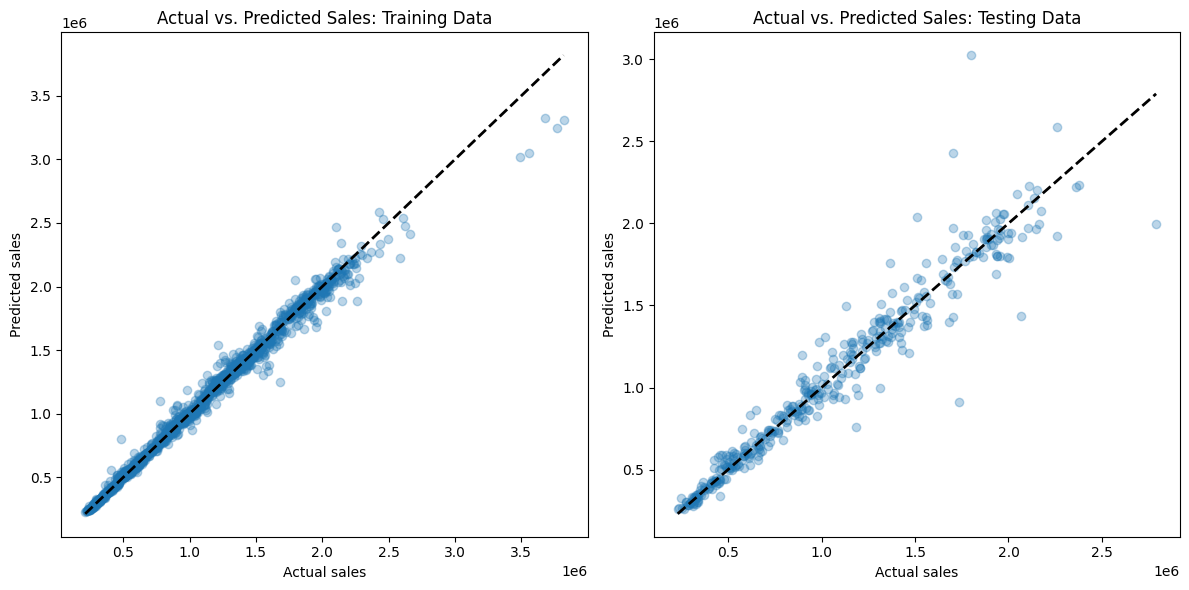

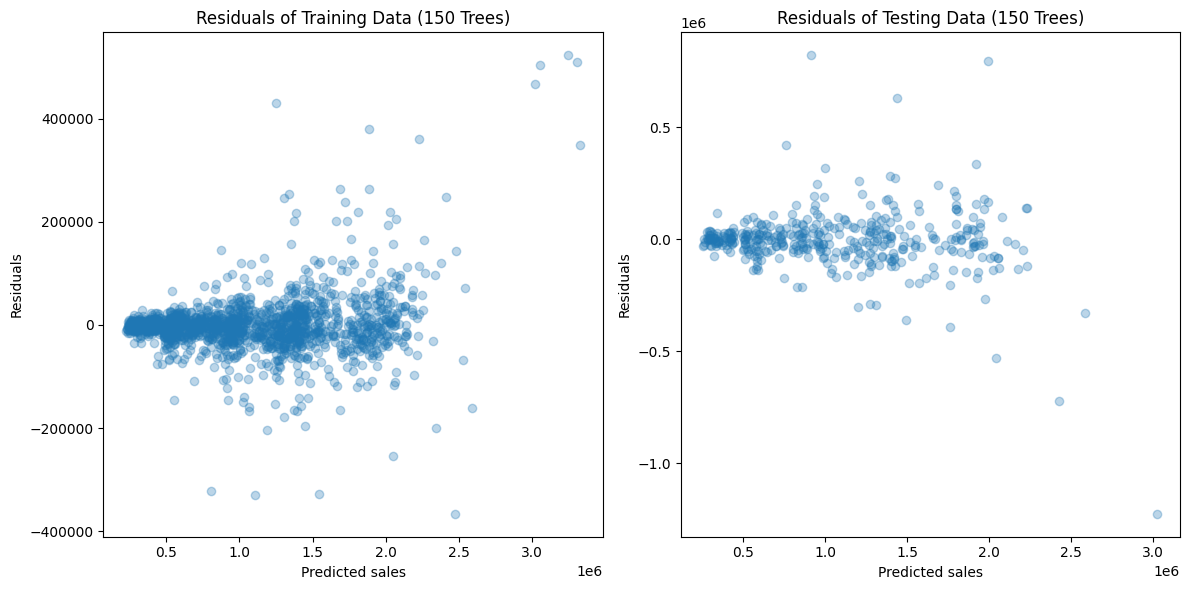

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate predictions on training and testing sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Recalculate metrics including MAE and MAPE for 150 trees
train_rmse_150 = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_150 = mean_squared_error(y_test, y_test_pred, squared=False)
train_mae_150 = mean_absolute_error(y_train, y_train_pred)
test_mae_150 = mean_absolute_error(y_test, y_test_pred)
train_mape_150 = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
test_mape_150 = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Output metrics for 150 trees
print(f"Training RMSE: {train_rmse_150}, Testing RMSE: {test_rmse_150}")
print(f"Training MAE: {train_mae_150}, Testing MAE: {test_mae_150}")
print(f"Training MAPE: {train_mape_150:.2f}%, Testing MAPE: {test_mape_150:.2f}%")

# Plotting Actual vs. Predicted Sales for 150 trees
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Sales: Training Data')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Sales: Testing Data')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')

plt.tight_layout()
plt.show()

# Plotting residuals for 150 trees
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train - y_train_pred, alpha=0.3)
plt.title('Residuals of Training Data (150 Trees)')
plt.xlabel('Predicted sales')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.3)
plt.title('Residuals of Testing Data (150 Trees)')
plt.xlabel('Predicted sales')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


The Random Forest model was trained using various features such as store details, economic indicators, and weather conditions, and then its performance was tested on both familiar and new data. Metrics like RMSE, MAE, and MAPE were used to measure accuracy and errors, showing that the model fits well with familiar data but struggles with new data, hinting at potential overfitting. Visual analyses, like scatter plots and residual plots, supported these findings, highlighting better predictions on familiar data compared to new data and revealing patterns of error.

The evaluation indicates that the model excels with known data but faces challenges with unfamiliar data, suggesting a need to address overfitting and improve its ability to generalize. 